In [143]:
import pandas as pd
import os
import ast

# Datensatz einlesen

In [144]:
mypath = "."
folder_name='archive/'
file_path = f'{mypath}/{folder_name}/'

filename = os.path.join(file_path, 'RAW_recipes.csv')
RAW_recipes_df = pd.read_csv(filename)
RAW_recipes_df.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [145]:
import ast
tags = RAW_recipes_df['tags'].to_list()
tags = [ast.literal_eval(item) for item in tags]
tags = [item for sublist in tags for item in sublist]
tags = set(tags)
tags

{'',
 '1-day-or-more',
 '15-minutes-or-less',
 '3-steps-or-less',
 '30-minutes-or-less',
 '4-hours-or-less',
 '5-ingredients-or-less',
 '60-minutes-or-less',
 'Throw the ultimate fiesta with this sopaipillas recipe from Food.com.',
 'a1-sauce',
 'african',
 'american',
 'amish-mennonite',
 'angolan',
 'appetizers',
 'apples',
 'april-fools-day',
 'argentine',
 'artichoke',
 'asian',
 'asparagus',
 'australian',
 'austrian',
 'avocado',
 'bacon',
 'baja',
 'baked-beans',
 'baking',
 'bananas',
 'bar-cookies',
 'barbecue',
 'bass',
 'bean-soup',
 'beans',
 'beans-side-dishes',
 'bear',
 'beef',
 'beef-barley-soup',
 'beef-crock-pot',
 'beef-kidney',
 'beef-liver',
 'beef-organ-meats',
 'beef-ribs',
 'beef-sauces',
 'beef-sausage',
 'beginner-cook',
 'beijing',
 'belgian',
 'berries',
 'beverages',
 'birthday',
 'biscotti',
 'bisques-cream-soups',
 'black-bean-soup',
 'black-beans',
 'blueberries',
 'bok-choys',
 'brazilian',
 'bread-machine',
 'bread-pudding',
 'breads',
 'breakfast',
 '

In [146]:
pattern = 'chocolate'
is_included = RAW_recipes_df.tags.str.contains(pattern)
RAW_recipes_df['is_included'] = is_included
is_included.value_counts()

False    222193
True       9444
Name: tags, dtype: int64

In [147]:
RAW_recipes_df_cleaned = RAW_recipes_df.loc[RAW_recipes_df['is_included']]
RAW_recipes_df_cleaned.shape

(9444, 13)

In [148]:
RAW_recipes_df_cleaned.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,is_included
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6,True
30,get the sensation brownies,27087,70,37305,2002-05-03,"['weeknight', 'time-to-make', 'course', 'main-...","[174.4, 13.0, 67.0, 5.0, 4.0, 26.0, 7.0]",11,"['preheat oven to 350 degrees', 'grease 13 x 9...",a yummy thick chocolate mint brownie from york...,"['butter', 'sugar', 'vanilla', 'eggs', 'all-pu...",9,True
72,one pot brownies,32271,40,41809,2002-06-25,"['60-minutes-or-less', 'time-to-make', 'course...","[1389.5, 129.0, 410.0, 26.0, 42.0, 211.0, 51.0]",8,"['melt chocolate and butter in heavy pot', 'le...",this recipe was submitted by mrs. stuart padno...,"['unsweetened chocolate squares', 'butter', 's...",7,True
82,rich hot fudge cake,35964,45,34272,2002-08-02,"['60-minutes-or-less', 'time-to-make', 'course...","[580.0, 13.0, 362.0, 15.0, 11.0, 8.0, 40.0]",10,"['combine flour , sugar , 2 t cocoa , baking p...",this is a very rich hot fudge cake that i got ...,"['flour', 'sugar', 'cocoa', 'baking powder', '...",10,True
103,turtle squares,58651,30,35635,2003-04-07,"['30-minutes-or-less', 'time-to-make', 'course...","[172.4, 16.0, 51.0, 1.0, 2.0, 26.0, 6.0]",15,"['preheat oven to 350 degrees f', 'spray a 13 ...",for lovers of pecans and chocolate...,"['flour', 'brown sugar', 'butter', 'pecans', '...",5,True


In [149]:
RAW_recipes_df_cleaned.to_csv('choclate_recipes_data.csv', index=False)

In [150]:
choclate_data = pd.read_csv('choclate_recipes_data.csv')

In [151]:
choclate_data["steps"].to_list()

["['crumble cookies into a 9-inch pie plate , or cake pan', 'pat down to form an even layer', 'drizzle 1 cup of chocolate topping evenly over the cookies with a small spoon', 'scoop the vanilla ice cream on top of the chocolate and smooth down', 'cover with half of the sliced bananas', 'top with strawberry ice cream', 'cover and freeze until firm', 'before serving , top with 1 / 4 cup chocolate topping , whipped cream , and sliced bananas']",
 "['preheat oven to 350 degrees', 'grease 13 x 9 baking pan', 'in a large bowl , whisk together butter , sugar and vanilla', 'add eggs and stir until well combined', 'combine dry ingredients and blend well with wet ingredients', 'reserve 2 cups of batter and set aside', 'spread remaining batter in prepared pan', 'arrange peppermint patties in a single layer over batter , about 1 / 2 inch apart', 'carefully spread reserved 2 cups of batter on top', 'bake for 50- 55 minutes or until brownies begin to pull away from sides of pan', 'cool completely on

<AxesSubplot: >

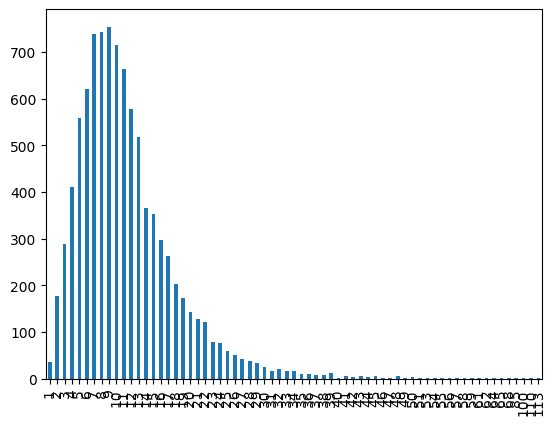

In [152]:
import matplotlib
choclate_data['n_steps'].value_counts().sort_index().plot.bar()


In [153]:
choclate_data = choclate_data.loc[(choclate_data['n_steps'] <= 25)]

In [154]:
choclate_data.shape

(9067, 13)

In [155]:
cooking_techniques = pd.read_csv('data/verb.vocab', header=None, names=["cooking_techniques"])
cooking_techniques

,cooking_techniques
0,lace
1,perch
2,pry
3,soften
4,snip
...,...
379,liquefy
380,crease
381,push
382,fasten


In [156]:
import ast
steps_as_one_string = ""
all_step_list = []
for recipe in choclate_data["steps"]:
    #step_list = ast.literal_eval(recipe)
    #print(type(step_list))
    for step in recipe:
        all_step_list.append(step)
    #steps_as_one_string = steps_as_one_string + step

#type(steps_as_one_string)

In [157]:
technniques = cooking_techniques['cooking_techniques'].to_list()
technniques

['lace',
 'perch',
 'pry',
 'soften',
 'snip',
 'skim',
 'skin',
 'follow',
 'strew',
 'whack',
 'simmer',
 'brown',
 'string',
 'ladle',
 'rise',
 'dampen',
 'spoon',
 'cook',
 'slather',
 'wipe',
 'cool',
 'stiffen',
 'whisk',
 'level',
 'tear',
 'pinch',
 'try',
 'sand',
 'adjust',
 'gut',
 'skewer',
 'dip',
 'round',
 'shave',
 'force',
 'fold',
 'barbecue',
 'bake',
 'poke',
 'peel',
 'melt',
 'crush',
 'devein',
 'punch',
 'water',
 'dry',
 'shove',
 'scramble',
 'leaven',
 'narrow',
 'divide',
 'lengthen',
 'replace',
 'plop',
 'zip',
 'paste',
 'dangle',
 'splash',
 'strike',
 'cram',
 'sharpen',
 'garnish',
 'tenderize',
 'warp',
 'warm',
 'stick',
 'grill',
 'join',
 'squish',
 'strain',
 'hardboil',
 'sweeten',
 'cap',
 'pour',
 'thin',
 'drill',
 'pickle',
 'scatter',
 'wedge',
 'debone',
 'encircle',
 'slit',
 'bend',
 'slip',
 'dress',
 'sit',
 'tilt',
 'enlarge',
 'stir',
 'stand',
 'moisten',
 'blacken',
 'lay',
 'drape',
 'bind',
 'smack',
 'scoop',
 'crumple',
 'wind'

In [158]:
counter = 0
steps_no_action = []

for step in all_step_list:
    if any(tech in step for tech in technniques):
        counter += 1

    else:
        steps_no_action.append(step)


In [159]:
steps_no_action

['[',
 "'",
 'c',
 'r',
 'u',
 'm',
 'b',
 'l',
 'e',
 ' ',
 'c',
 'o',
 'o',
 'k',
 'i',
 'e',
 's',
 ' ',
 'i',
 'n',
 't',
 'o',
 ' ',
 'a',
 ' ',
 '9',
 '-',
 'i',
 'n',
 'c',
 'h',
 ' ',
 'p',
 'i',
 'e',
 ' ',
 'p',
 'l',
 'a',
 't',
 'e',
 ' ',
 ',',
 ' ',
 'o',
 'r',
 ' ',
 'c',
 'a',
 'k',
 'e',
 ' ',
 'p',
 'a',
 'n',
 "'",
 ',',
 ' ',
 "'",
 'p',
 'a',
 't',
 ' ',
 'd',
 'o',
 'w',
 'n',
 ' ',
 't',
 'o',
 ' ',
 'f',
 'o',
 'r',
 'm',
 ' ',
 'a',
 'n',
 ' ',
 'e',
 'v',
 'e',
 'n',
 ' ',
 'l',
 'a',
 'y',
 'e',
 'r',
 "'",
 ',',
 ' ',
 "'",
 'd',
 'r',
 'i',
 'z',
 'z',
 'l',
 'e',
 ' ',
 '1',
 ' ',
 'c',
 'u',
 'p',
 ' ',
 'o',
 'f',
 ' ',
 'c',
 'h',
 'o',
 'c',
 'o',
 'l',
 'a',
 't',
 'e',
 ' ',
 't',
 'o',
 'p',
 'p',
 'i',
 'n',
 'g',
 ' ',
 'e',
 'v',
 'e',
 'n',
 'l',
 'y',
 ' ',
 'o',
 'v',
 'e',
 'r',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'c',
 'o',
 'o',
 'k',
 'i',
 'e',
 's',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'a',
 ' ',
 's',
 'm',
 'a',
 'l',
 'l',
 ' ',
 's',
 'p'

In [160]:
# recipes = []
# for recipe in choclate_data["steps"]:
#     for step in step_list:
#         if any(tech not in step for tech in steps_no_action):
#             recipes.append(recipe)

            
        

In [161]:
def clean_recipe(recipe_string):
    #step_list = ast.literal_eval(recipe_string)
    step_list = recipe_string

    for step in step_list:
         if not any(tech in step for tech in technniques):
            print(step)
            step_list.remove(step)

    return step_list

In [162]:
choclate_data['steps'] = choclate_data['steps'].apply(clean_recipe)

[


AttributeError: 'str' object has no attribute 'remove'

In [ ]:
choclate_data['steps'].to_list()

[['crumble cookies into a 9-inch pie plate , or cake pan',
  'pat down to form an even layer',
  'drizzle 1 cup of chocolate topping evenly over the cookies with a small spoon',
  'scoop the vanilla ice cream on top of the chocolate and smooth down',
  'cover with half of the sliced bananas',
  'top with strawberry ice cream',
  'cover and freeze until firm',
  'before serving , top with 1 / 4 cup chocolate topping , whipped cream , and sliced bananas'],
 ['preheat oven to 350 degrees',
  'grease 13 x 9 baking pan',
  'in a large bowl , whisk together butter , sugar and vanilla',
  'add eggs and stir until well combined',
  'combine dry ingredients and blend well with wet ingredients',
  'reserve 2 cups of batter and set aside',
  'spread remaining batter in prepared pan',
  'arrange peppermint patties in a single layer over batter , about 1 / 2 inch apart',
  'carefully spread reserved 2 cups of batter on top',
  'bake for 50- 55 minutes or until brownies begin to pull away from sides

In [ ]:
recipes

["['crumble cookies into a 9-inch pie plate , or cake pan', 'pat down to form an even layer', 'drizzle 1 cup of chocolate topping evenly over the cookies with a small spoon', 'scoop the vanilla ice cream on top of the chocolate and smooth down', 'cover with half of the sliced bananas', 'top with strawberry ice cream', 'cover and freeze until firm', 'before serving , top with 1 / 4 cup chocolate topping , whipped cream , and sliced bananas']",
 "['crumble cookies into a 9-inch pie plate , or cake pan', 'pat down to form an even layer', 'drizzle 1 cup of chocolate topping evenly over the cookies with a small spoon', 'scoop the vanilla ice cream on top of the chocolate and smooth down', 'cover with half of the sliced bananas', 'top with strawberry ice cream', 'cover and freeze until firm', 'before serving , top with 1 / 4 cup chocolate topping , whipped cream , and sliced bananas']",
 "['crumble cookies into a 9-inch pie plate , or cake pan', 'pat down to form an even layer', 'drizzle 1 c

In [ ]:
len(all_step_list)

6119925

In [ ]:
counter

0

In [ ]:
TECHNIQUES_LIST = [
    'bake',
    'barbecue',
    'blanch',
    'blend',
    'boil',
    'braise',
    'brine',
    'broil',
    'caramelize',
    'combine',
    'crock pot',
    'crush',
    'deglaze',
    'devein',
    'dice',
    'distill',
    'drain',
    'emulsify',
    'ferment',
    'freez',
    'fry',
    'grate',
    'griddle',
    'grill',
    'knead',
    'leaven',
    'marinate',
    'mash',
    'melt',
    'microwave',
    'parboil',
    'pickle',
    'poach',
    'pour',
    'pressure cook',
    'puree',
    'refrigerat',
    'roast',
    'saute',
    'scald',
    'scramble',
    'shred',
    'simmer',
    'skillet',
    'slow cook',
    'smoke',
    'smooth',
    'soak',
    'sous-vide',
    'steam',
    'stew',
    'strain',
    'tenderize',
    'thicken',
    'toast',
    'toss',
    'whip',
    'whisk',
]

In [ ]:

tags

{'',
 '1-day-or-more',
 '15-minutes-or-less',
 '3-steps-or-less',
 '30-minutes-or-less',
 '4-hours-or-less',
 '5-ingredients-or-less',
 '60-minutes-or-less',
 'Throw the ultimate fiesta with this sopaipillas recipe from Food.com.',
 'a1-sauce',
 'african',
 'american',
 'amish-mennonite',
 'angolan',
 'appetizers',
 'apples',
 'april-fools-day',
 'argentine',
 'artichoke',
 'asian',
 'asparagus',
 'australian',
 'austrian',
 'avocado',
 'bacon',
 'baja',
 'baked-beans',
 'baking',
 'bananas',
 'bar-cookies',
 'barbecue',
 'bass',
 'bean-soup',
 'beans',
 'beans-side-dishes',
 'bear',
 'beef',
 'beef-barley-soup',
 'beef-crock-pot',
 'beef-kidney',
 'beef-liver',
 'beef-organ-meats',
 'beef-ribs',
 'beef-sauces',
 'beef-sausage',
 'beginner-cook',
 'beijing',
 'belgian',
 'berries',
 'beverages',
 'birthday',
 'biscotti',
 'bisques-cream-soups',
 'black-bean-soup',
 'black-beans',
 'blueberries',
 'bok-choys',
 'brazilian',
 'bread-machine',
 'bread-pudding',
 'breads',
 'breakfast',
 '

In [ ]:
len(tags)

552

## RAW interactions

In [ ]:
filename = os.path.join(file_path, 'RAW_interactions.csv')
RAW_interactions_df = pd.read_csv(filename)
RAW_interactions_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


## PP users

In [ ]:
filename = os.path.join(file_path, 'PP_users.csv')
PP_users_df = pd.read_csv(filename)
PP_users_df.head(10)

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
5,5,"[96, 2, 0, 38, 71, 0, 3, 9, 1, 90, 12, 13, 0, ...","[122026, 57553, 176588, 64777, 22746, 13097, 1...",290,"[4.0, 4.0, 1.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, ...",290
6,6,"[2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...","[64490, 3, 98141, 49558]",4,"[5.0, 5.0, 5.0, 5.0]",4
7,7,"[6, 0, 0, 2, 1, 0, 0, 1, 0, 5, 1, 0, 0, 0, 0, ...","[12938, 43057, 84375, 105841, 62768, 155858, 1...",16,"[0.0, 5.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16
8,8,"[87, 1, 0, 33, 49, 0, 0, 8, 2, 95, 1, 4, 0, 1,...","[139822, 28774, 149235, 127227, 73843, 68663, ...",232,"[4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, ...",232
9,9,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...","[116193, 3, 20238, 9967, 11115, 96404]",6,"[4.0, 5.0, 5.0, 3.0, 5.0, 5.0]",6


## PP recipes

In [ ]:
filename = os.path.join(file_path, 'PP_recipes.csv')
PP_recipes_df = pd.read_csv(filename)
PP_recipes_df.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


## Save relevant data to seperate file

In [ ]:
# Select relevant columns

data_df = RAW_recipes_df_cleaned[['id','name', 'steps']]
data_df.head()

,id,name,steps
8,70971,bananas 4 ice cream pie,"['crumble cookies into a 9-inch pie plate , or..."
30,27087,get the sensation brownies,"['preheat oven to 350 degrees', 'grease 13 x 9..."
72,32271,one pot brownies,"['melt chocolate and butter in heavy pot', 'le..."
82,35964,rich hot fudge cake,"['combine flour , sugar , 2 t cocoa , baking p..."
103,58651,turtle squares,"['preheat oven to 350 degrees f', 'spray a 13 ..."


In [ ]:
data_df = data_df.dropna()
data_df.shape

(9444, 3)

In [ ]:
path = os.path.join('data', 'filtered_data.parquet')
data_df.to_parquet(path)

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.